In [3]:
## Boiler-plate code 
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()


llm = ChatGroq(
     model="llama-3.1-8b-instant",
     temperature=0
)

response = llm.invoke("What is the capital of sri lanka?")
print(response.content)


The capital of Sri Lanka is Colombo. However, the administrative capital is Sri Jayawardenepura Kotte.


In [4]:
from pydantic import BaseModel,Field

class graph_schema(BaseModel):
    topic: str = Field(description="the topic of the graph")
    post: str = Field(description="the linked inn post content")
    curated_post: str = Field(description="the curated linked inn post content")



In [7]:
def create_post(state: graph_schema) -> graph_schema:
    # Convert pydantic object to dict
    state = state.model_dump()
    topic = state['topic']
    post = llm.invoke(f"Write a linkedinn post about {topic}").content

    state['post'] = post
    return state

def curate_post(state:graph_schema) -> graph_schema:
    state = state.model_dump()
    post = state['post']
    curated_post = llm.invoke(f"curate the following linkedinn post with genZ tone about {post}").content

    state['curated_post'] = curated_post
    
    return state 

In [ ]:
from langgraph.graph import StateGraph,START,END

graph = StateGraph(
    graph_schema
)

graph.add_node("create_post",create_post)
graph.add_node("curate_post",curate_post)



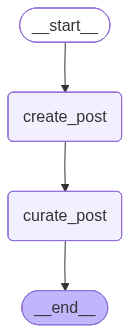

In [10]:
graph.add_edge(START,"create_post")
graph.add_edge("create_post","curate_post")
graph.add_edge("curate_post",END)
graph.compile()

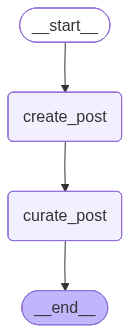

In [14]:
pydantic_graph = graph.compile()
pydantic_graph

In [15]:
response = pydantic_graph.invoke(
    {
        "topic": "The importance of data privacy in digital era.",
        'post': "",
        "curated_post": ""
    }
)

In [21]:
for key,val in response.items():
    print(f"{key}: {val}")

topic: The importance of data privacy in digital era.
post: **Protecting Your Digital Footprint: The Importance of Data Privacy in the Digital Era**

As we continue to navigate the digital landscape, it's essential to acknowledge the importance of data privacy in today's world. With the rise of social media, online shopping, and cloud storage, our personal data is more vulnerable than ever.

**Why Data Privacy Matters**

1. **Prevents Identity Theft**: Protecting your personal data from unauthorized access can prevent identity theft, financial loss, and damage to your credit score.
2. **Maintains Online Security**: Data privacy ensures that your online transactions, communications, and activities remain secure and confidential.
3. **Respects Your Autonomy**: Data privacy gives you control over your personal information, allowing you to decide who can access it and how it's used.
4. **Boosts Trust**: Companies that prioritize data privacy demonstrate a commitment to transparency and acc